## ECGR 4105 - Homework 3, Problem # 1

In [1]:
# Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Importing necessary Libraries for Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.metrics import precision_recall_curve

# Importing Necessary libraries and Cancer Dataset from sklearn 
from sklearn.datasets import load_breast_cancer

## Problem # 1

Problem # 1 uses "Cancer" dataset (from the Sklearn) to build a Naive Bayesian model to classify the type of cancer (Malignant Vs. Bening). The classification Accuracy, Precision, and Recall will all be plotted over a different number of Ks.

In [3]:
breast = load_breast_cancer()

In [5]:
X = breast.data
Y = breast.target

In [6]:
X = np.reshape(X,(569,30))
Y = np.reshape(Y,(569,1))

In [7]:
# MinMax and Standard Scaling as part of Data Preprocessing
Min_Max_Scaling = MinMaxScaler()
breast_dataset = Min_Max_Scaling.fit_transform(X)

Standard_Scaling = StandardScaler()
breast_dataset = Standard_Scaling.fit_transform(X)
breast_dataset = pd.DataFrame(breast_dataset)
breast_dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [10]:
final_breast_data = np.concatenate([breast_dataset, Y], axis = 1)
final_breast_data.shape

(569, 31)

In [11]:
breast_dataset = pd.DataFrame(final_breast_data)

In [16]:
features = np.append(breast.feature_names, "target")
breast_dataset.columns =  features
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0.0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0.0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0.0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0.0
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,1.0


In [17]:
# Splitting the Data into Training and Validation(Test) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [30]:
# Line of Code to Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [31]:
model = GaussianNB()
model.fit(X_train, Y_train)

Predicted = model.predict(X_test)
Predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

In [ ]:
print(classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

In [32]:
print(metrics.classification_report(Y_test, Predicted))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [39]:
Confusion_Matrix = metrics.confusion_matrix(Y_test, Predicted)
print(Confusion_Matrix)

[[43  4]
 [ 4 63]]


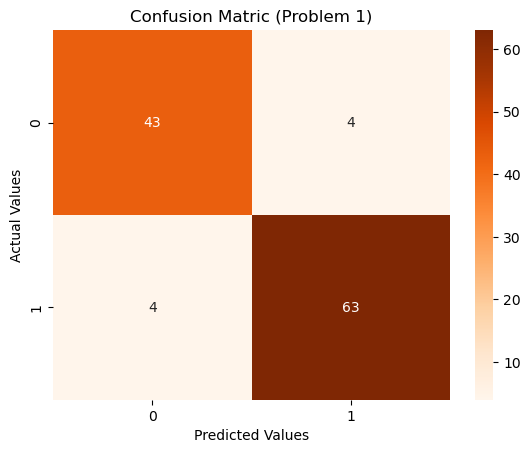

In [40]:
#Generation of a Confusion Matrix Plot
# Plotting the Binary Classifier Model
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

# Representation of the Binary Classifier using a Confusion Matrix
sns.heatmap(pd.DataFrame(Confusion_Matrix), annot = True, cmap = "Oranges", fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matric (Problem 1)");

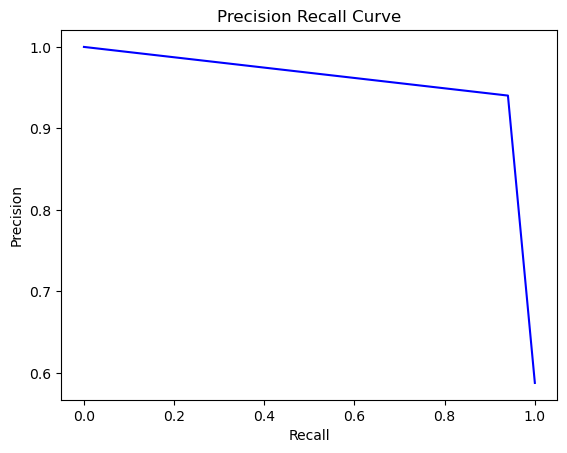

In [35]:
# Generation of the Precision Recall Curve
precision, recall, threshold = precision_recall_curve(Y_test, Predicted)

fig, ax = plt.subplots()
ax.plot(recall, precision, color = "blue")
ax.set_title("Precision Recall Curve")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.show();